In [4]:
!pip install pandas numpy scikit-learn matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import scipy.sparse as sp

In [6]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [8]:
df = df.fillna("")
cols = ['name','genre','type','episodes','rating','members']
data = df[[c for c in cols if c in df.columns]]
data.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
data['episodes'] = pd.to_numeric(data['episodes'], errors='coerce').fillna(0)
if 'rating' in data.columns:
    data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)
if 'members' in data.columns:
    data['members'] = pd.to_numeric(data['members'], errors='coerce').fillna(0)
data['genre'] = data['genre'].replace("", "Unknown")
data['type'] = data['type'].replace("", "Unknown")
data.head()

C:\Users\91705\AppData\Local\Temp\ipykernel_20364\3138821853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['episodes'] = pd.to_numeric(data['episodes'], errors='coerce').fillna(0)
C:\Users\91705\AppData\Local\Temp\ipykernel_20364\3138821853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)
C:\Users\91705\AppData\Local\Temp\ipykernel_20364\3138821853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [10]:
data['mix'] = data['genre'].astype(str) + ' ' + data['type'].astype(str)
data['genre_list'] = data['genre'].apply(lambda x: [g.strip() for g in x.split(',')] if x!='Unknown' else [])
data.head()

,name,genre,type,episodes,rating,members,mix,genre_list
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,"Drama, Romance, School, Supernatural Movie","[Drama, Romance, School, Supernatural]"
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"Action, Adventure, Drama, Fantasy, Magic, Mili...","[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,"Action, Comedy, Historical, Parody, Samurai, S...","[Action, Comedy, Historical, Parody, Samurai, ..."
3,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,"Sci-Fi, Thriller TV","[Sci-Fi, Thriller]"
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,"Action, Comedy, Historical, Parody, Samurai, S...","[Action, Comedy, Historical, Parody, Samurai, ..."


In [11]:
cv = CountVectorizer()
text_vec = cv.fit_transform(data['mix'])
text_vec.shape

(12294, 53)

In [12]:
sc = MinMaxScaler()
num = sc.fit_transform(data[['episodes','rating','members']])
num.shape

(12294, 3)

In [13]:
num_sparse = sp.csr_matrix(num)
final_vec = sp.hstack([text_vec, num_sparse])
final_vec.shape

(12294, 56)

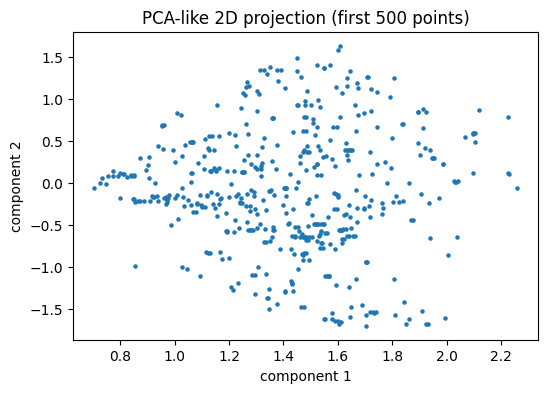

In [14]:
svd = TruncatedSVD(n_components=50, random_state=42)
vec_2d = svd.fit_transform(final_vec)
plt.figure(figsize=(6,4))
plt.scatter(vec_2d[:500,0], vec_2d[:500,1], s=5)
plt.title('PCA-like 2D projection (first 500 points)')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [15]:
sim = cosine_similarity(final_vec)
sim.shape

(12294, 12294)

In [16]:
def recommend(anime_name, k=10, min_sim=0.2):
    if anime_name not in data['name'].values:
        return []
    idx = data.index[data['name']==anime_name][0]
    scores = list(enumerate(sim[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    picks = []
    for i,s in scores[1:]:
        if s>=min_sim:
            picks.append((data.iloc[i]['name'], round(s,3)))
        if len(picks)==k:
            break
    return picks

In [17]:
recommend("Naruto", k=10, min_sim=0.2)

[('Naruto: Shippuuden', np.float64(0.998)),
 ('Dragon Ball Z', np.float64(0.898)),
 ('Dragon Ball Kai', np.float64(0.885)),
 ('Dragon Ball Super', np.float64(0.884)),
 ('Medaka Box', np.float64(0.883)),
 ('Tenjou Tenge', np.float64(0.883)),
 ('Medaka Box Abnormal', np.float64(0.881)),
 ('Dragon Ball Kai (2014)', np.float64(0.881)),
 ('Katekyo Hitman Reborn!', np.float64(0.872)),
 ('Naruto: Shippuuden Movie 4 - The Lost Tower', np.float64(0.866))]

In [18]:
def recommend_with_genre_filter(anime_name, genre, k=10, min_sim=0.2):
    if anime_name not in data['name'].values:
        return []
    idx = data.index[data['name']==anime_name][0]
    candidates = data[data['genre'].str.contains(genre, na=False)].index.tolist()
    scores = [(i, sim[idx][i]) for i in candidates]
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    picks = []
    for i,s in scores:
        if i==idx: continue
        if s>=min_sim:
            picks.append((data.iloc[i]['name'], round(s,3)))
        if len(picks)==k:
            break
    return picks

In [19]:
recommend_with_genre_filter("Naruto", "Action", k=10, min_sim=0.15)

[('Naruto: Shippuuden', np.float64(0.998)),
 ('Dragon Ball Z', np.float64(0.898)),
 ('Dragon Ball Kai', np.float64(0.885)),
 ('Dragon Ball Super', np.float64(0.884)),
 ('Medaka Box', np.float64(0.883)),
 ('Tenjou Tenge', np.float64(0.883)),
 ('Medaka Box Abnormal', np.float64(0.881)),
 ('Dragon Ball Kai (2014)', np.float64(0.881)),
 ('Katekyo Hitman Reborn!', np.float64(0.872)),
 ('Naruto: Shippuuden Movie 4 - The Lost Tower', np.float64(0.866))]

In [20]:
def precision_at_k(anime_name, k=10):
    recs = recommend(anime_name, k=k, min_sim=0)
    if not recs:
        return None
    target_genres = set([g.strip() for g in data[data['name']==anime_name].iloc[0]['genre'].split(',')])
    if not target_genres:
        return 0
    hits = 0
    for r,_ in recs:
        r_genres = set([g.strip() for g in data[data['name']==r].iloc[0]['genre'].split(',')])
        if target_genres & r_genres:
            hits += 1
    return hits/len(recs)

sample = data['name'].dropna().values[:50]
precisions = [precision_at_k(n, k=10) for n in sample]
mean_prec = np.nanmean([p for p in precisions if p is not None])
mean_prec

np.float64(1.0)

In [21]:
mean_prec

np.float64(1.0)

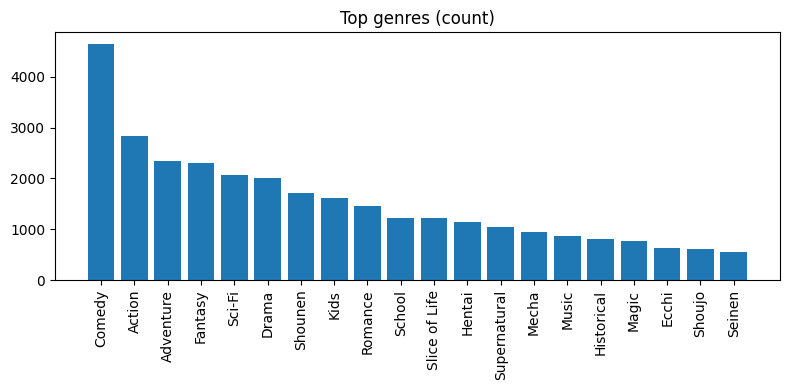

In [22]:
top_genres = {}
for gl in data['genre_list']:
    for g in gl:
        top_genres[g] = top_genres.get(g,0)+1
items = sorted(top_genres.items(), key=lambda x:x[1], reverse=True)[:20]
labels = [i[0] for i in items]
vals = [i[1] for i in items]
plt.figure(figsize=(8,4))
plt.bar(range(len(vals)), vals)
plt.xticks(range(len(vals)), labels, rotation=90)
plt.title('Top genres (count)')
plt.tight_layout()
plt.show()

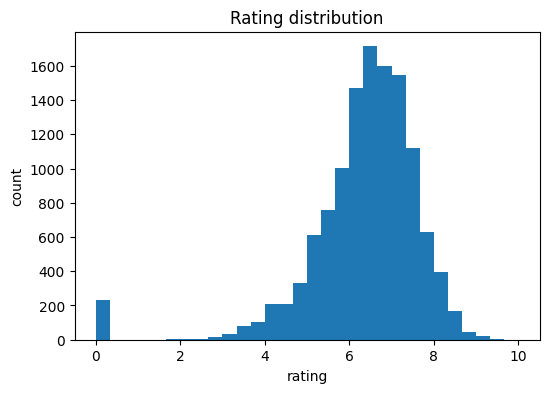

In [23]:
plt.figure(figsize=(6,4))
plt.hist(data['rating'].dropna(), bins=30)
plt.title('Rating distribution')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

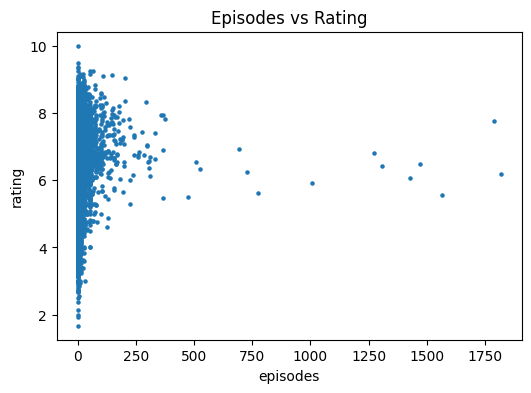

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(data['episodes'].replace(0,np.nan), data['rating'].replace(0,np.nan), s=5)
plt.title('Episodes vs Rating')
plt.xlabel('episodes')
plt.ylabel('rating')
plt.show()

In [25]:
def evaluate_precision_at_k_list(sample_names, k=10):
    results = []
    for n in sample_names:
        p = precision_at_k(n,k)
        results.append((n,p))
    return pd.DataFrame(results, columns=['anime','precision_at_k']).sort_values('precision_at_k', ascending=False)

res_df = evaluate_precision_at_k_list(sample[:30], k=10)
res_df

,anime,precision_at_k
0,Kimi no Na wa.,1.0
1,Fullmetal Alchemist: Brotherhood,1.0
2,Gintama°,1.0
3,Steins;Gate,1.0
4,Gintama&#039;,1.0
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,1.0
6,Hunter x Hunter (2011),1.0
7,Ginga Eiyuu Densetsu,1.0
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,1.0
9,Gintama&#039;: Enchousen,1.0


In [26]:
name_inp = input("Enter anime name: ").strip()

recs = recommend(name_inp, k=10, min_sim=0.2)
recs


[('Naruto: Shippuuden', np.float64(0.998)),
 ('Dragon Ball Z', np.float64(0.898)),
 ('Dragon Ball Kai', np.float64(0.885)),
 ('Dragon Ball Super', np.float64(0.884)),
 ('Medaka Box', np.float64(0.883)),
 ('Tenjou Tenge', np.float64(0.883)),
 ('Medaka Box Abnormal', np.float64(0.881)),
 ('Dragon Ball Kai (2014)', np.float64(0.881)),
 ('Katekyo Hitman Reborn!', np.float64(0.872)),
 ('Naruto: Shippuuden Movie 4 - The Lost Tower', np.float64(0.866))]